# House Price Project

## Import neccesary library

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## import Dataset

In [3]:
tr_df=pd.read_csv('training_set.csv')
tr_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Information

In [4]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
tr_df.shape

(1460, 81)

In [6]:
tr_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Null value Treatment

<Axes: >

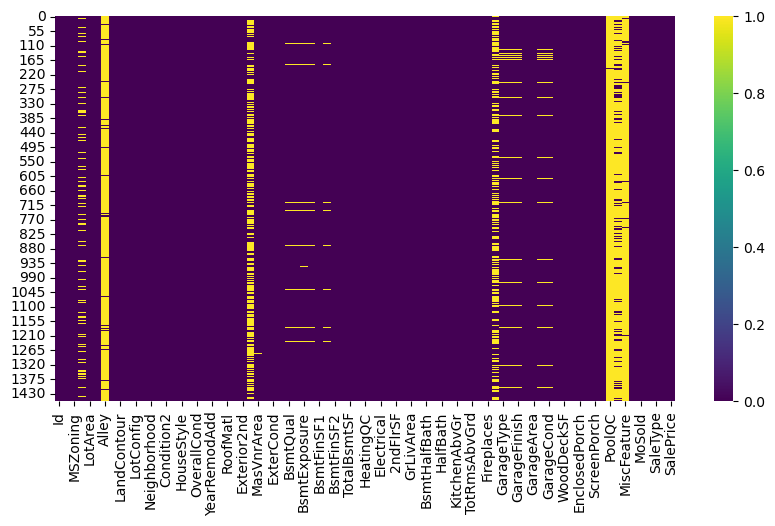

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(tr_df.isna(),cmap=plt.cm.viridis)

In [8]:
for i in tr_df.columns:
    if tr_df[i].dtypes==object:
        tr_df[i]=tr_df[i].fillna(tr_df[i].mode()[0])
    else:
        tr_df[i]=tr_df[i].fillna(tr_df[i].mean())

In [9]:
tr_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## Exploratory Data Analysis (EDA)

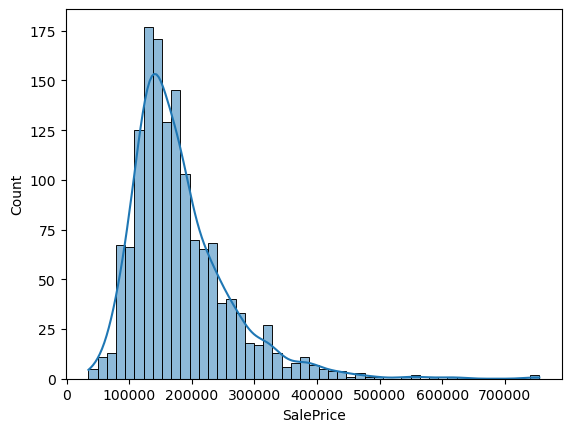

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of SalePrice
sns.histplot(tr_df['SalePrice'],kde=True)
plt.show()

Id


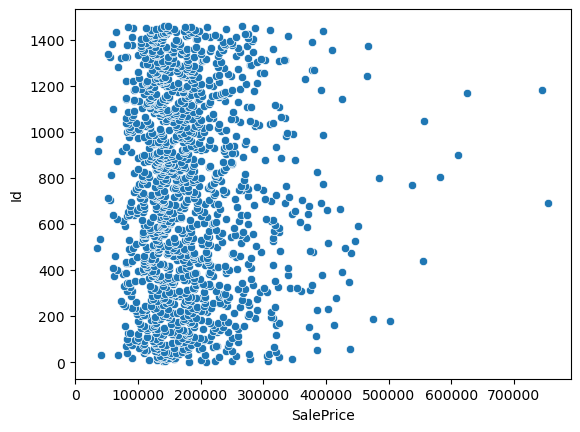

MSSubClass


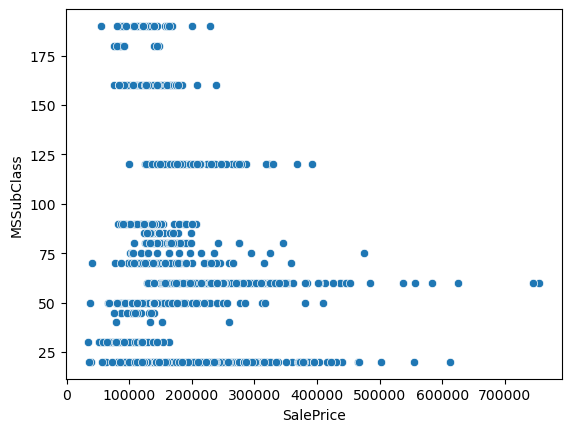

MSZoning


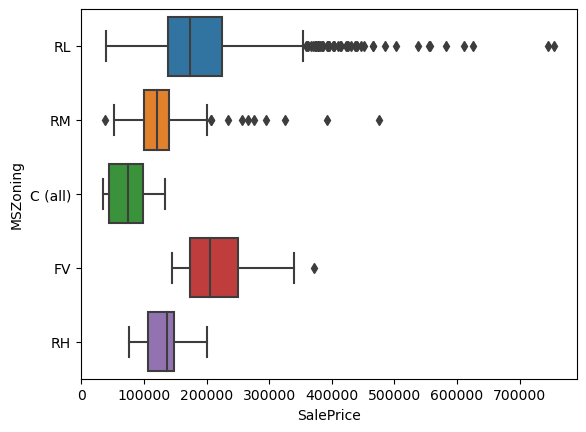

LotFrontage


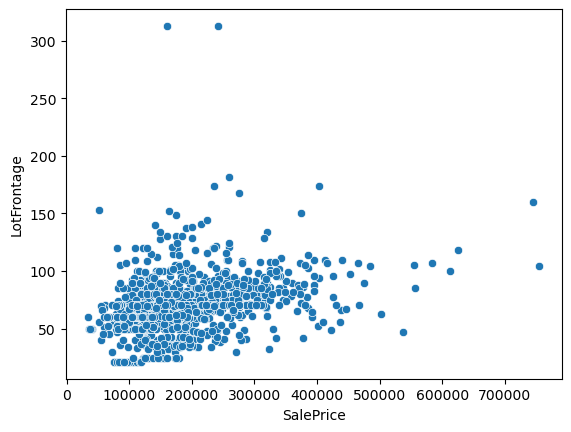

LotArea


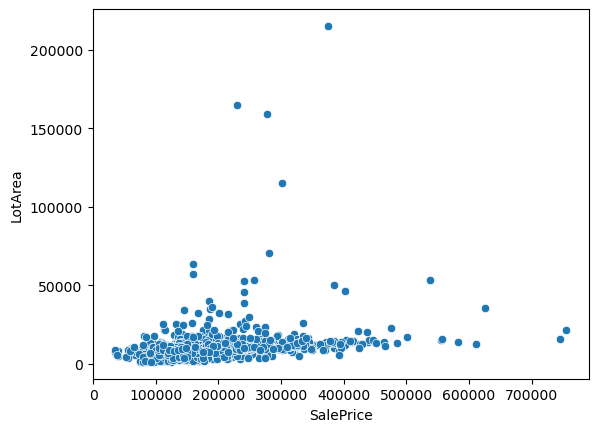

Street


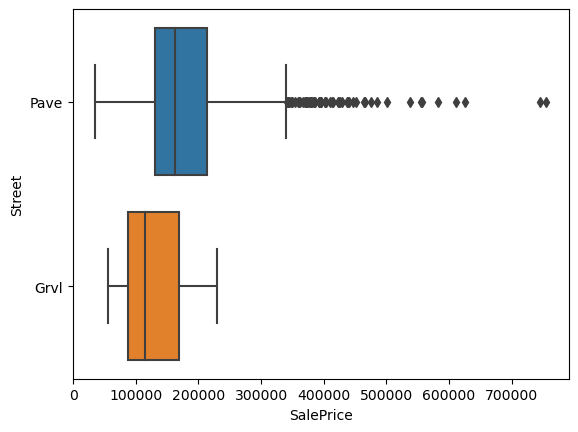

Alley


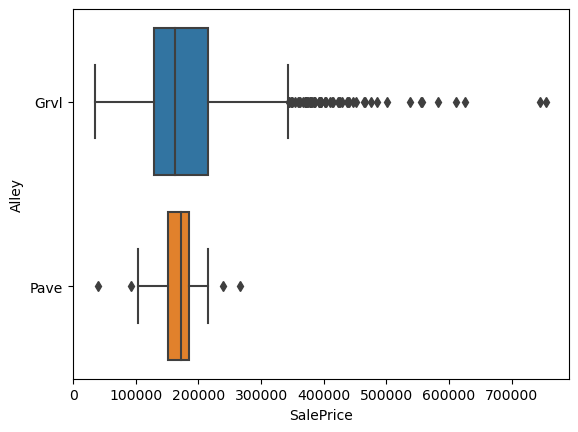

LotShape


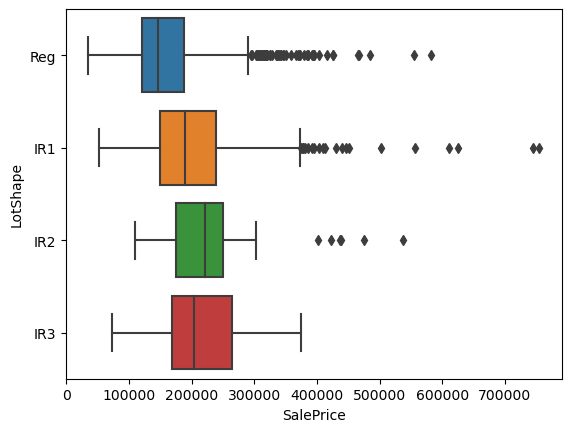

LandContour


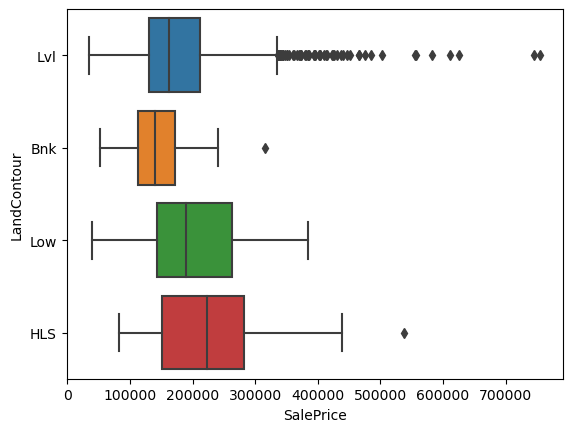

Utilities


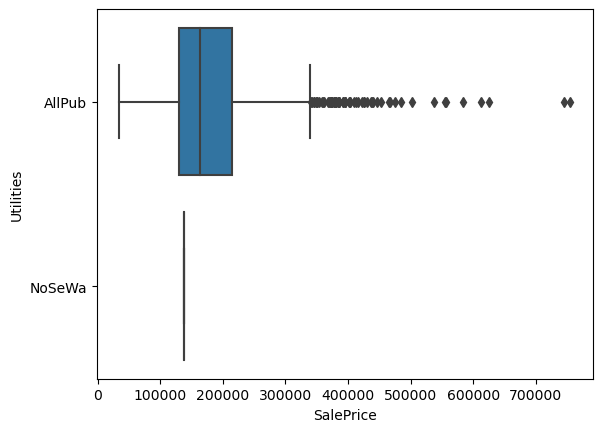

LotConfig


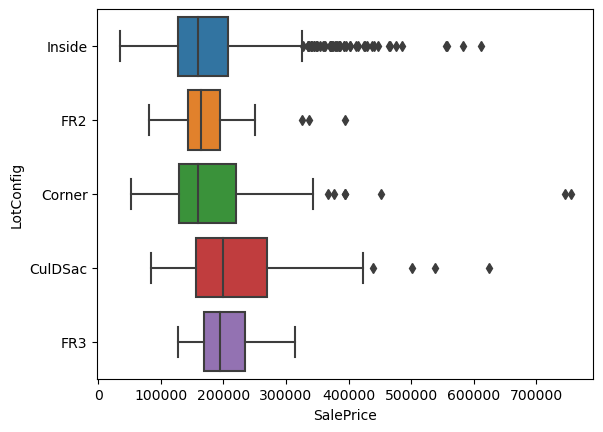

LandSlope


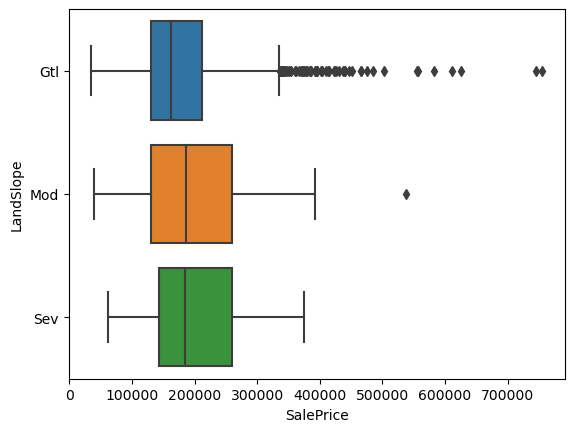

Neighborhood


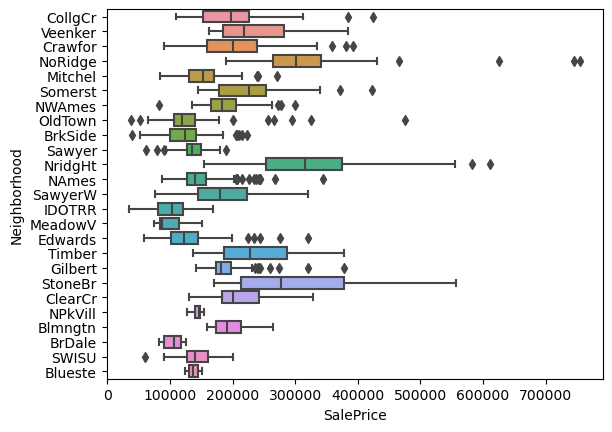

Condition1


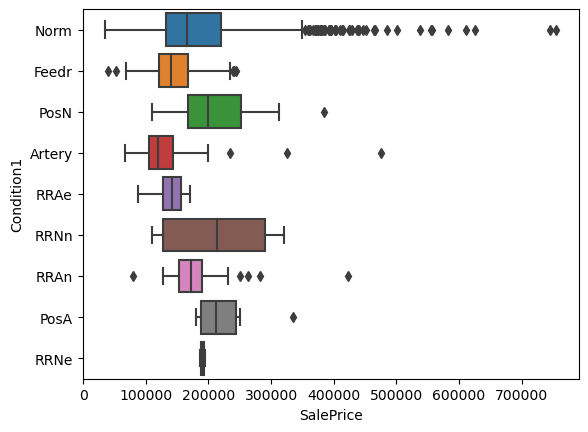

Condition2


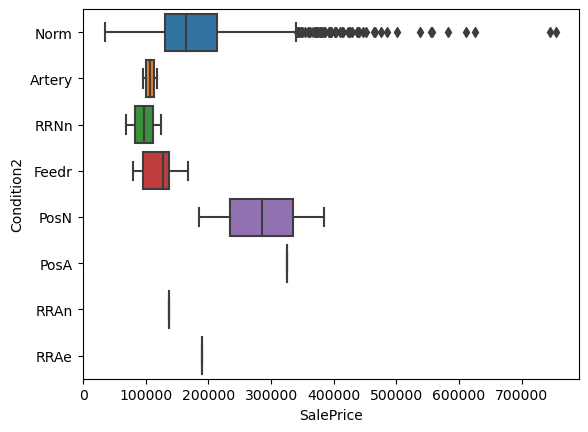

BldgType


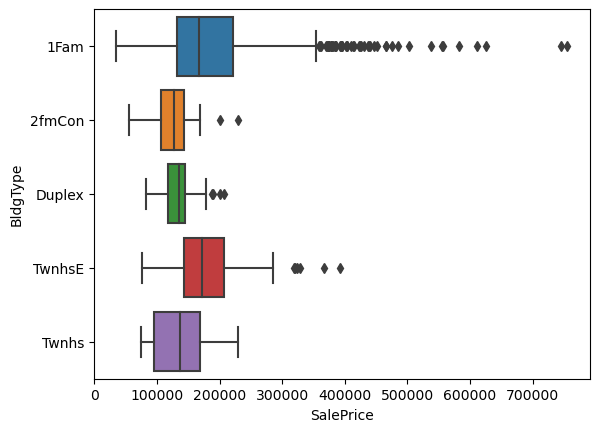

HouseStyle


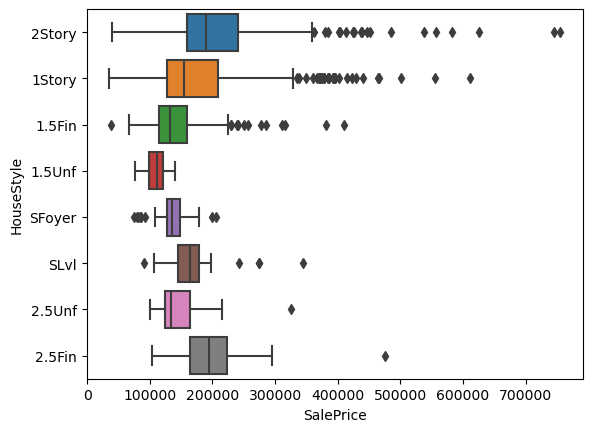

OverallQual


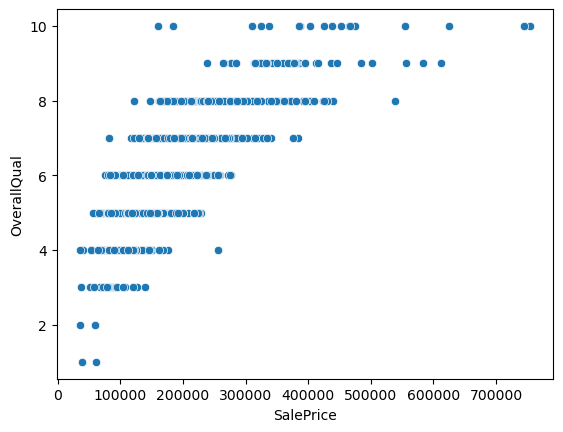

OverallCond


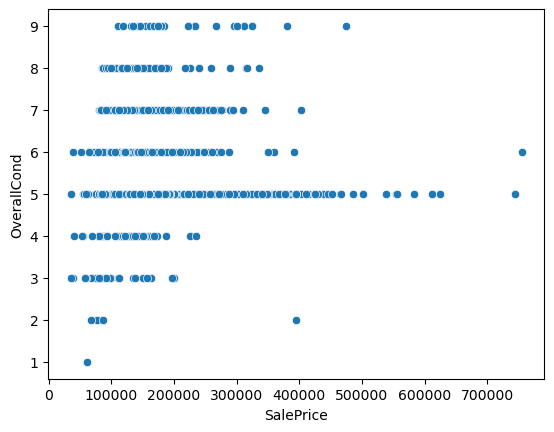

YearBuilt


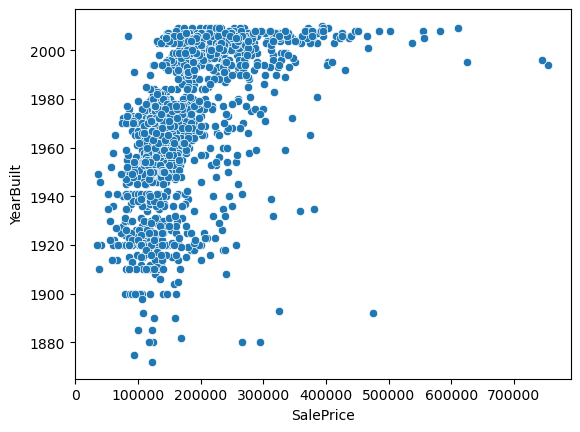

YearRemodAdd


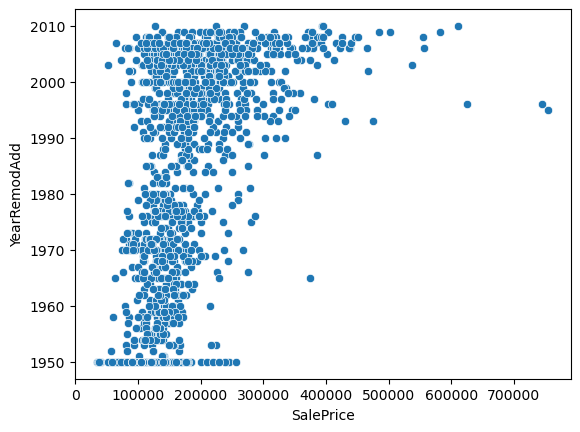

RoofStyle


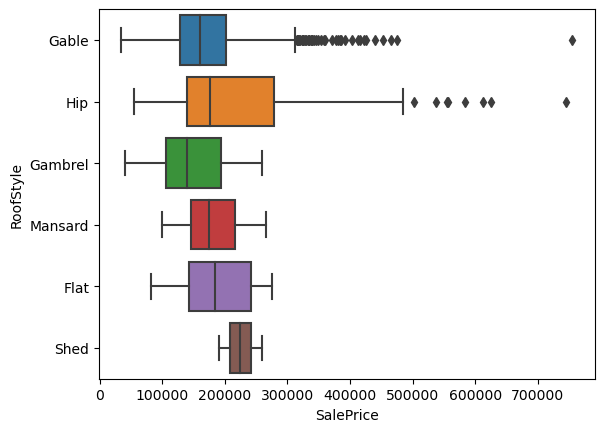

RoofMatl


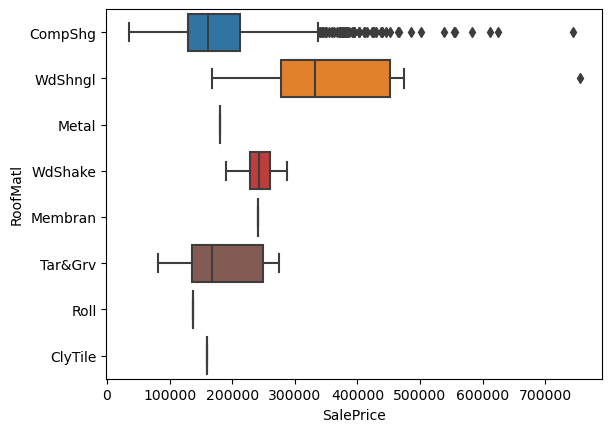

Exterior1st


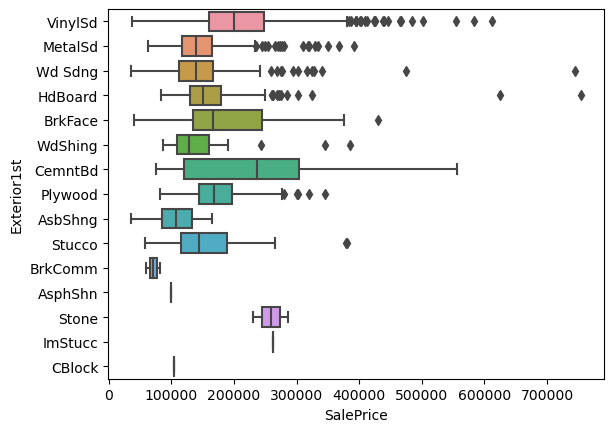

Exterior2nd


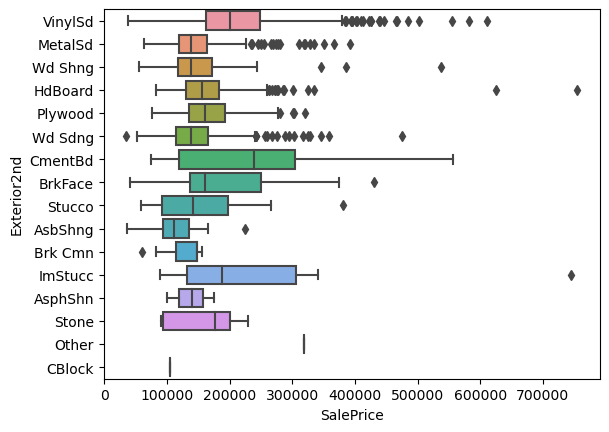

MasVnrType


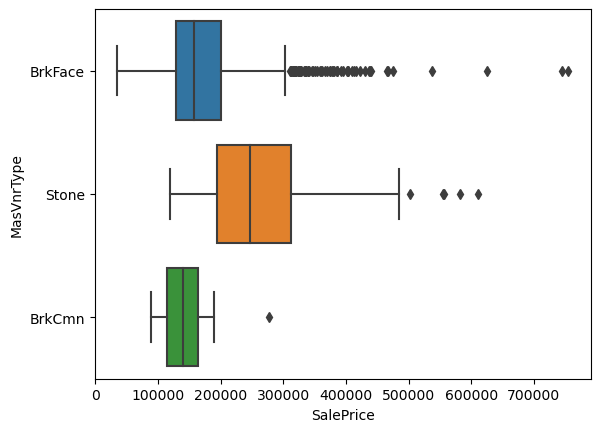

MasVnrArea


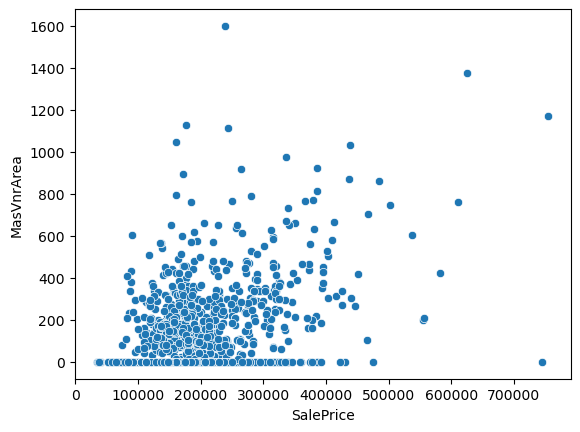

ExterQual


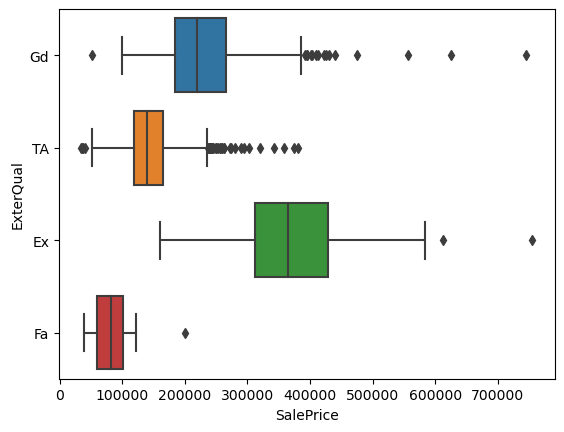

ExterCond


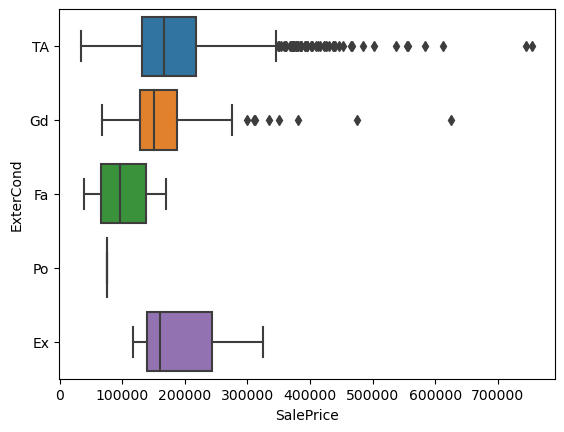

Foundation


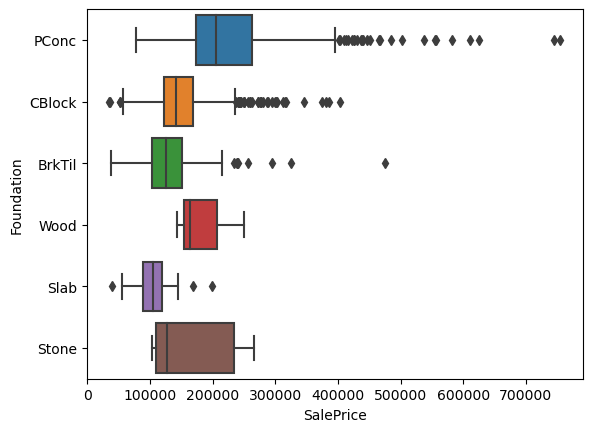

BsmtQual


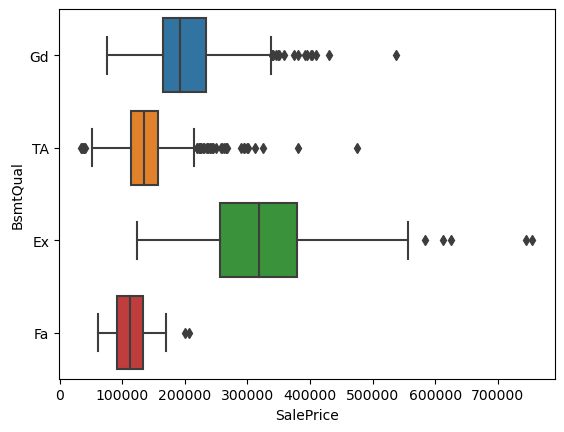

BsmtCond


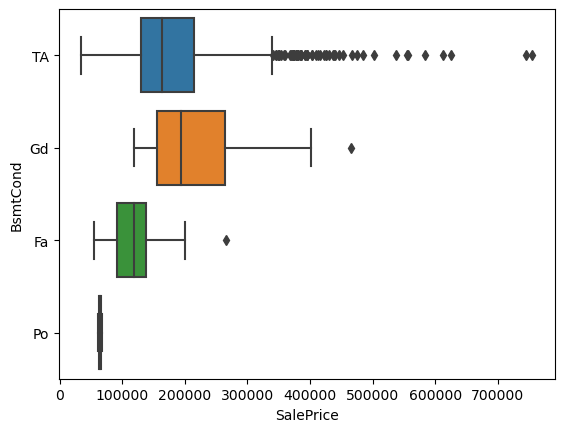

BsmtExposure


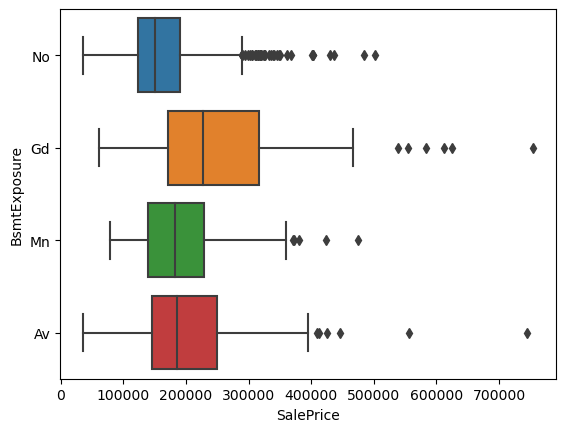

BsmtFinType1


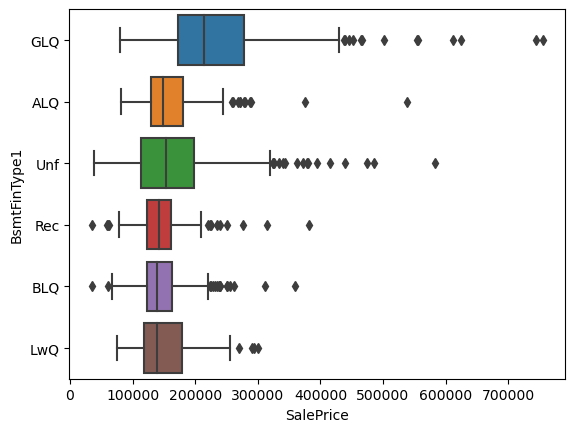

BsmtFinSF1


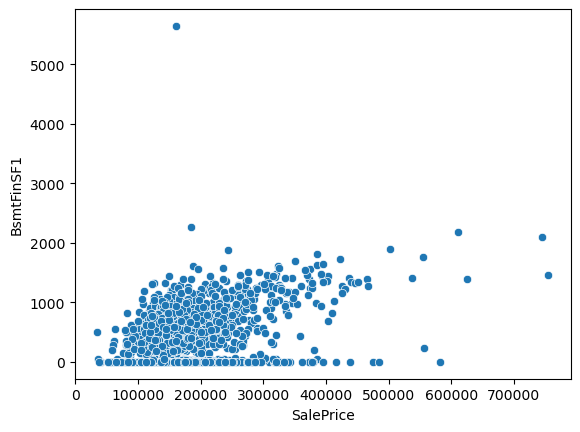

BsmtFinType2


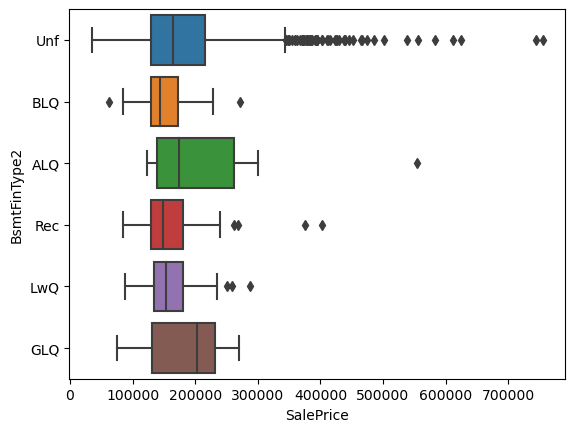

BsmtFinSF2


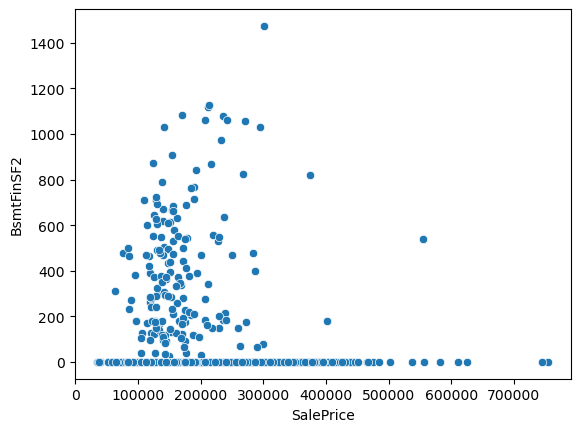

BsmtUnfSF


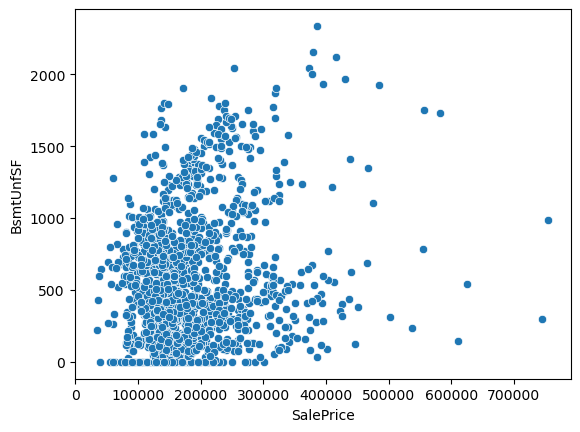

TotalBsmtSF


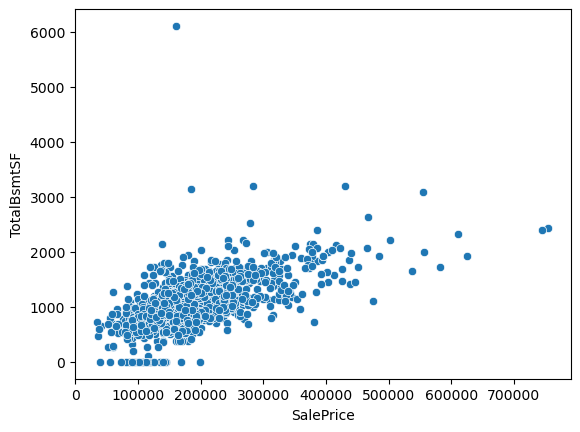

Heating


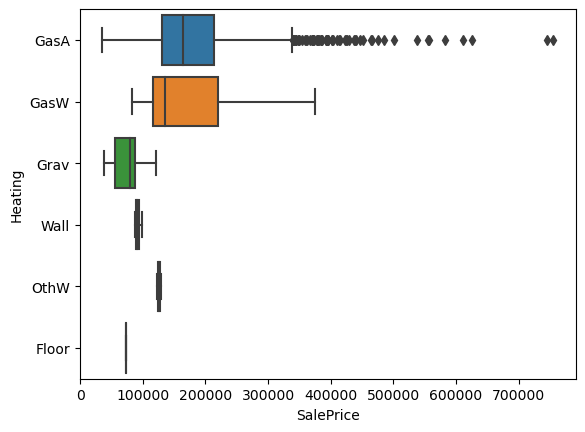

HeatingQC


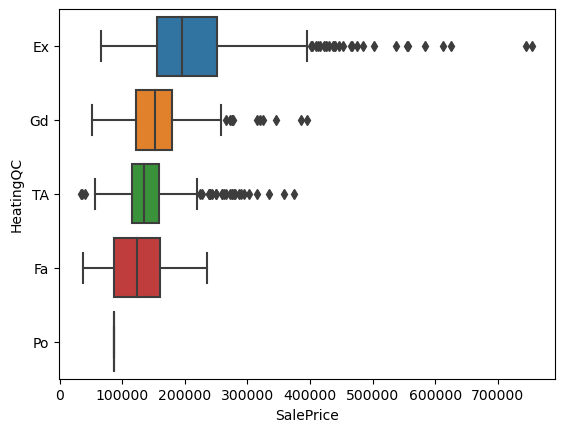

CentralAir


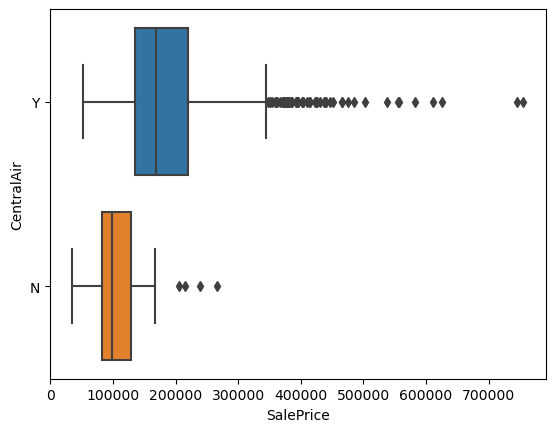

Electrical


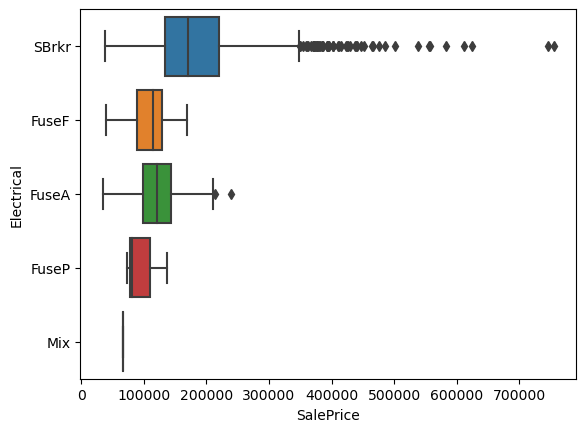

1stFlrSF


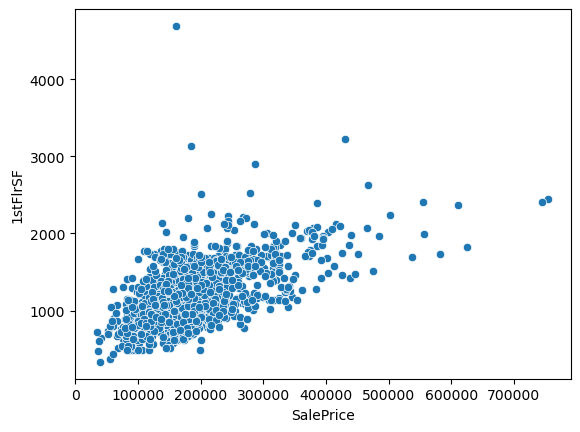

2ndFlrSF


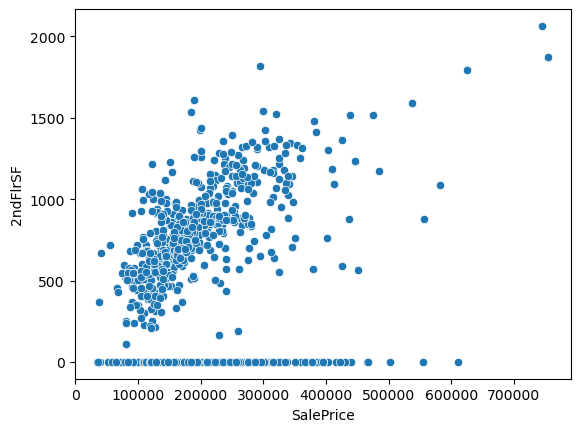

LowQualFinSF


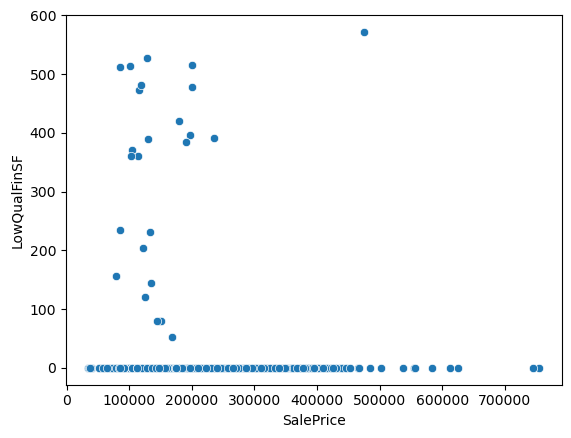

GrLivArea


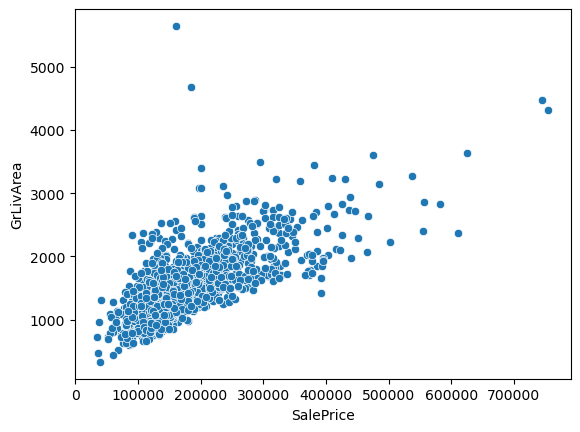

BsmtFullBath


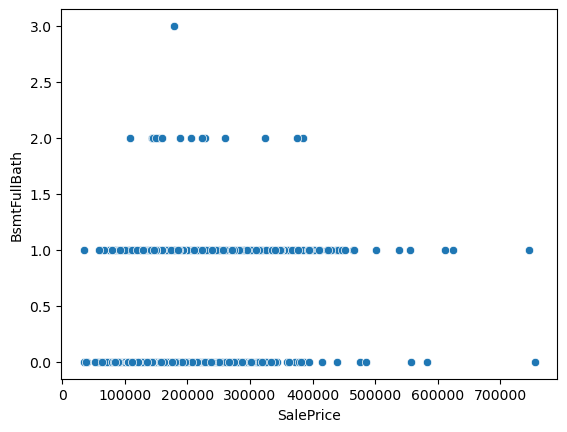

BsmtHalfBath


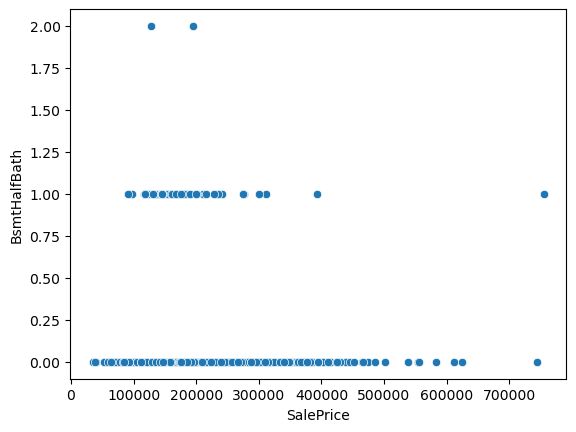

FullBath


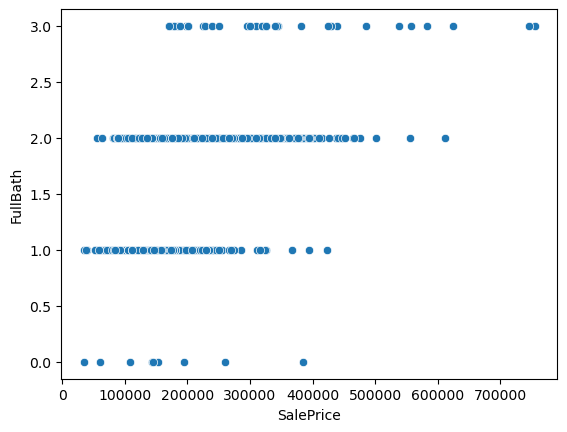

HalfBath


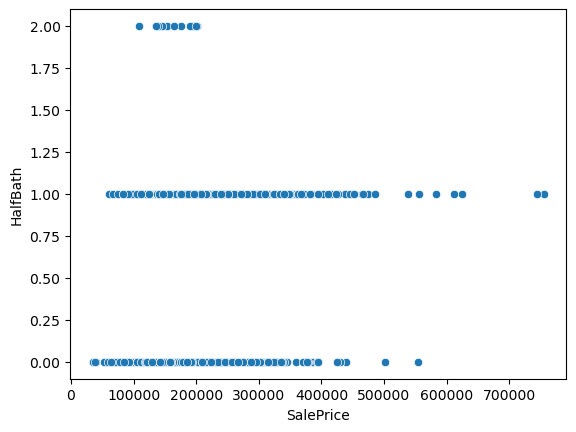

BedroomAbvGr


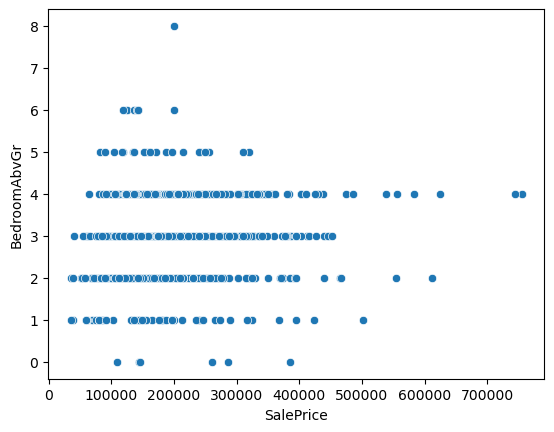

KitchenAbvGr


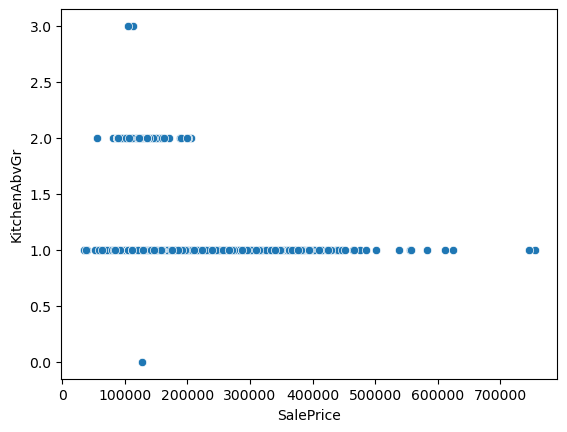

KitchenQual


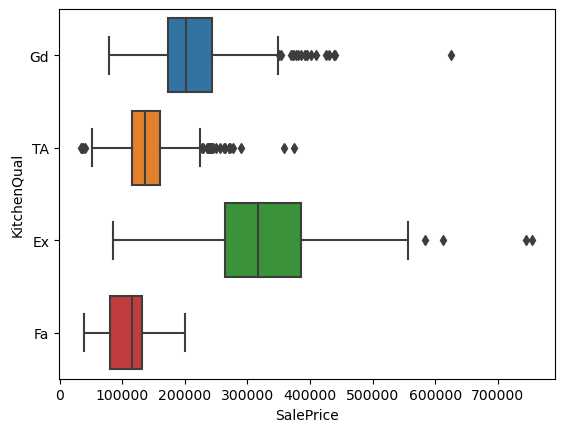

TotRmsAbvGrd


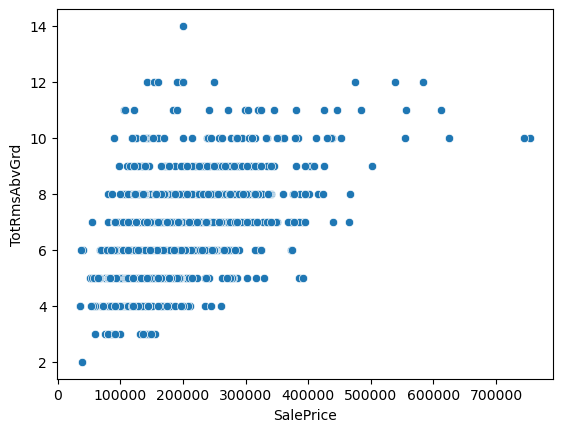

Functional


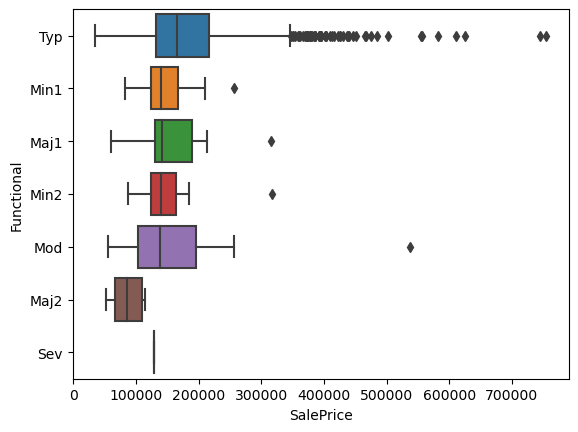

Fireplaces


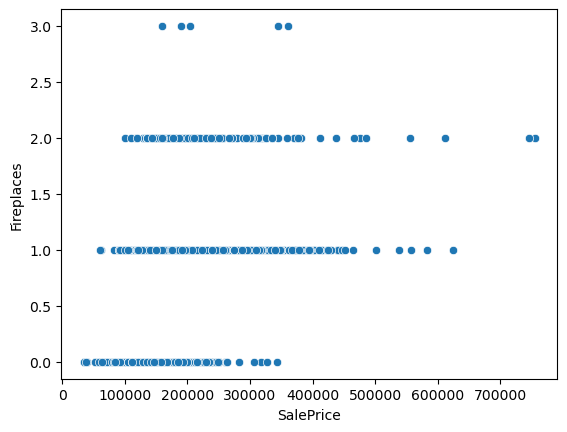

FireplaceQu


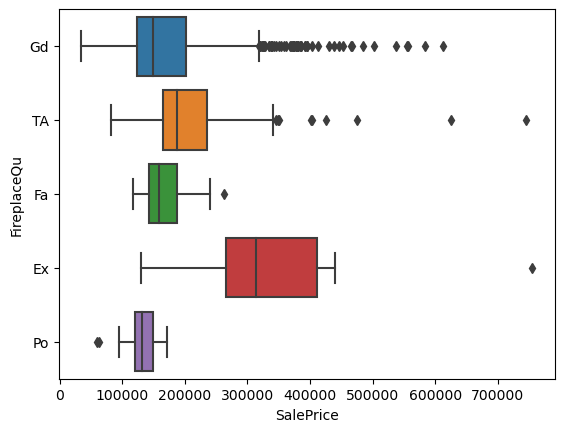

GarageType


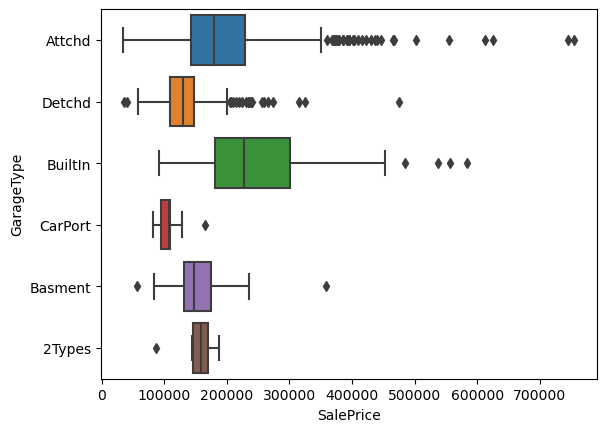

GarageYrBlt


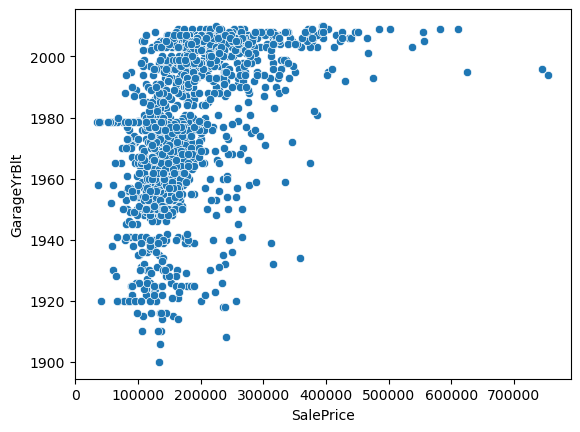

GarageFinish


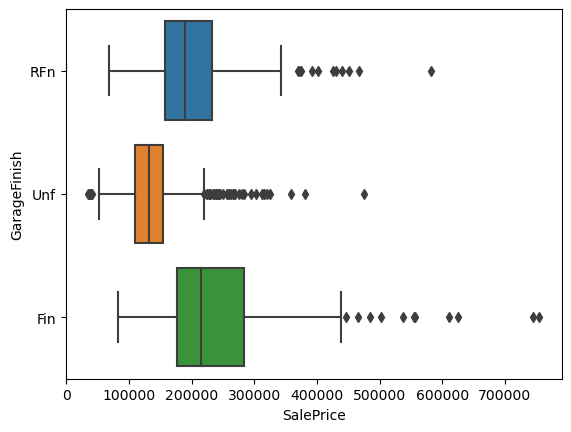

GarageCars


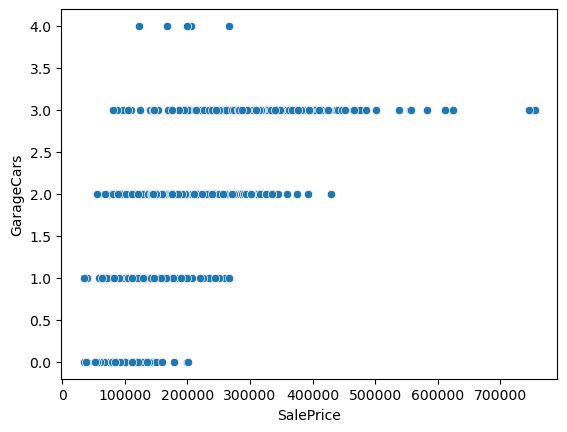

GarageArea


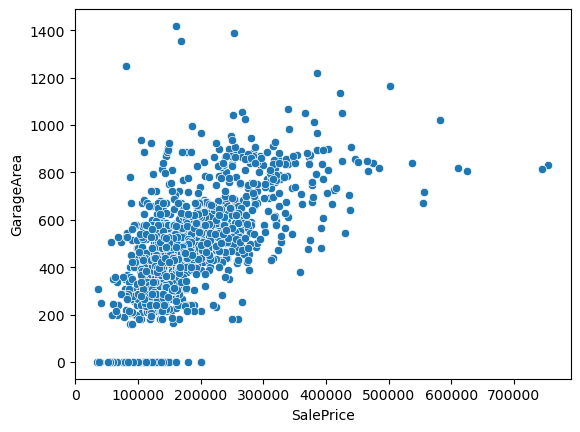

GarageQual


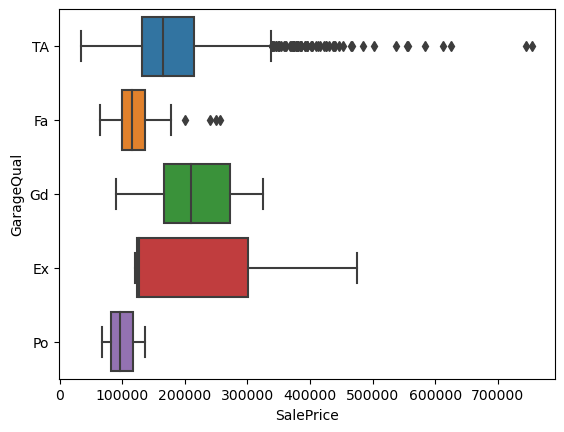

GarageCond


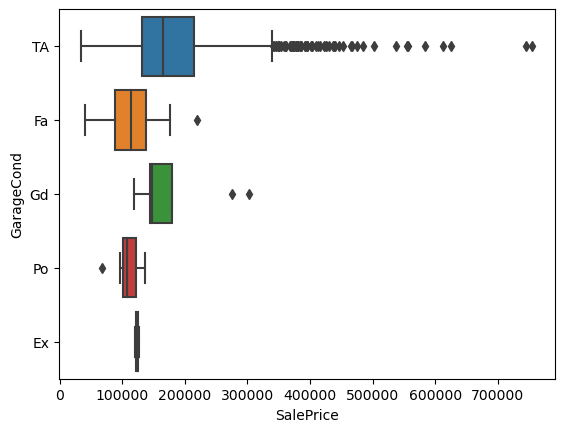

PavedDrive


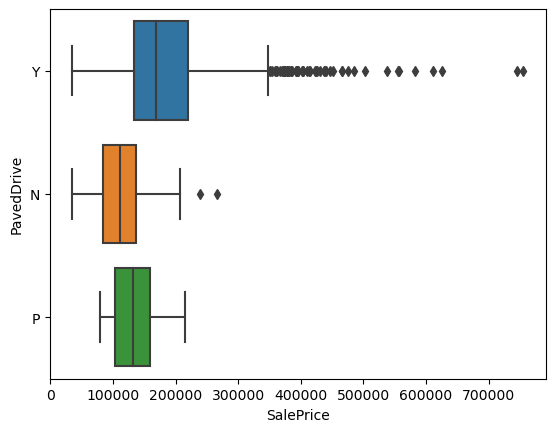

WoodDeckSF


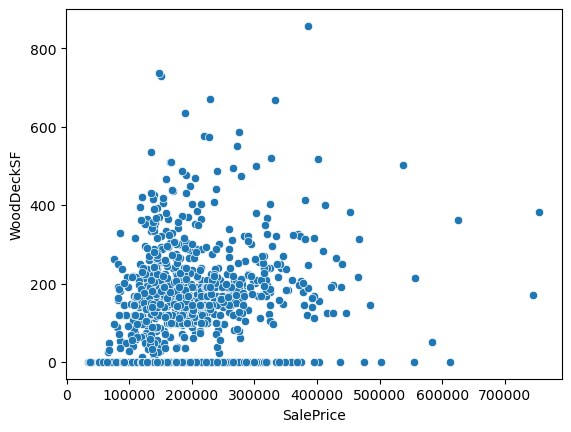

OpenPorchSF


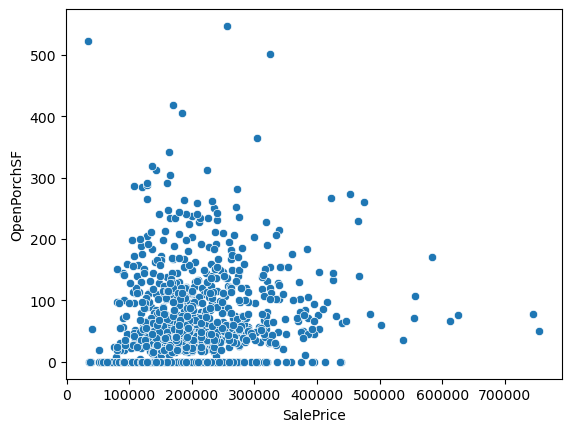

EnclosedPorch


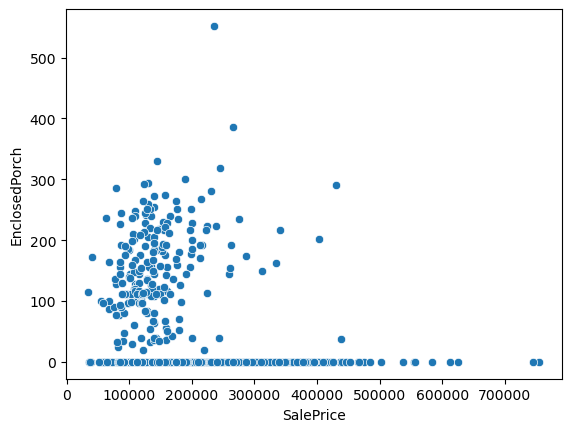

3SsnPorch


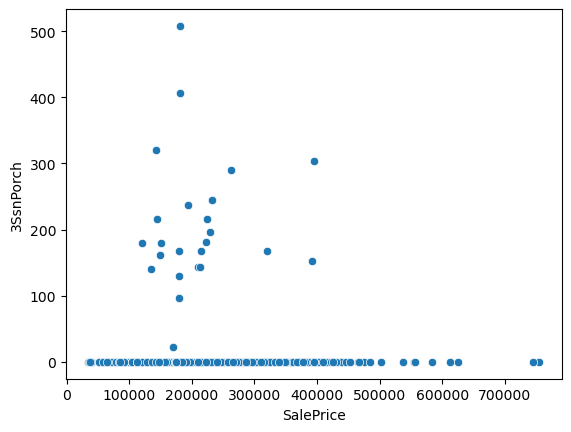

ScreenPorch


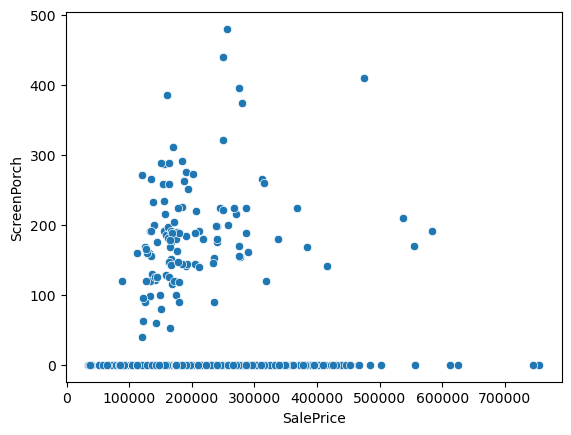

PoolArea


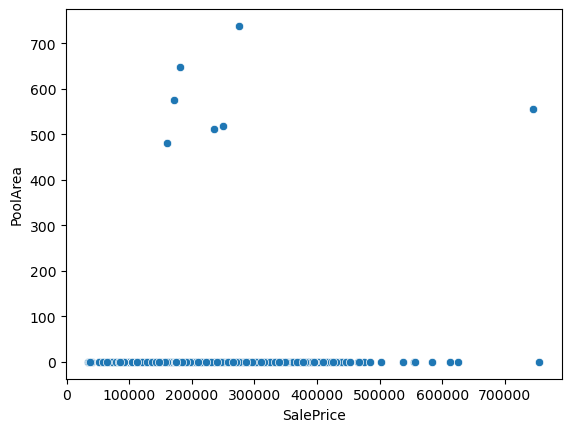

PoolQC


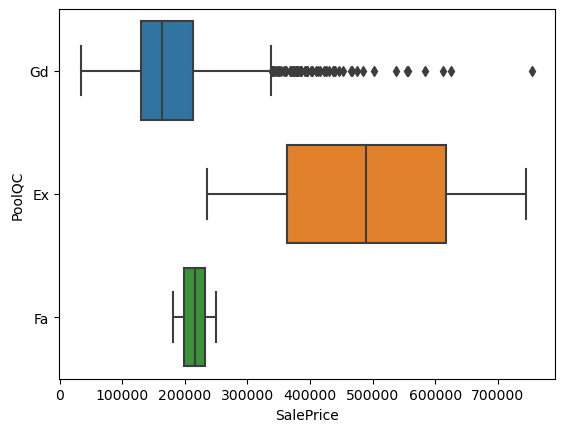

Fence


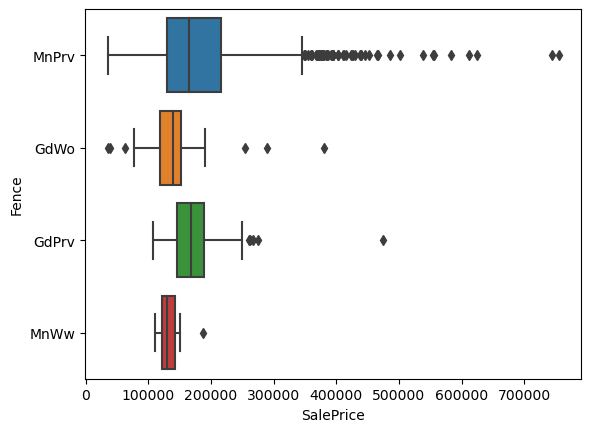

MiscFeature


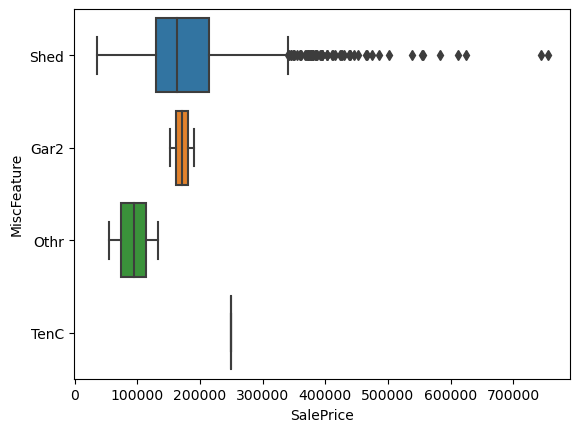

MiscVal


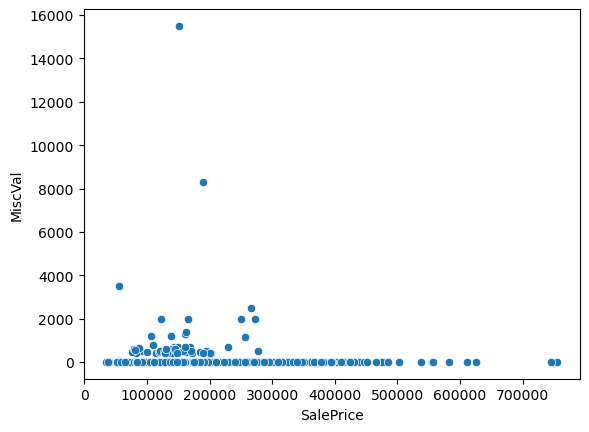

MoSold


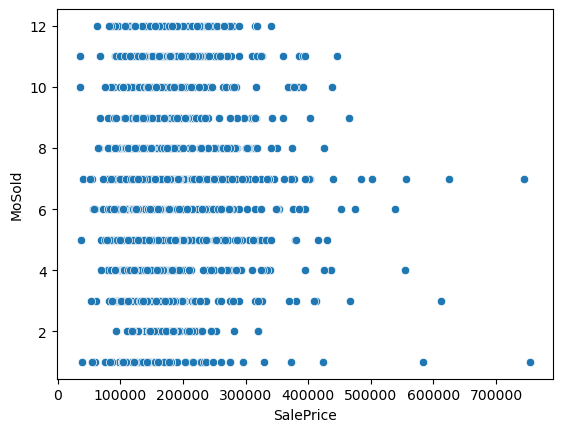

YrSold


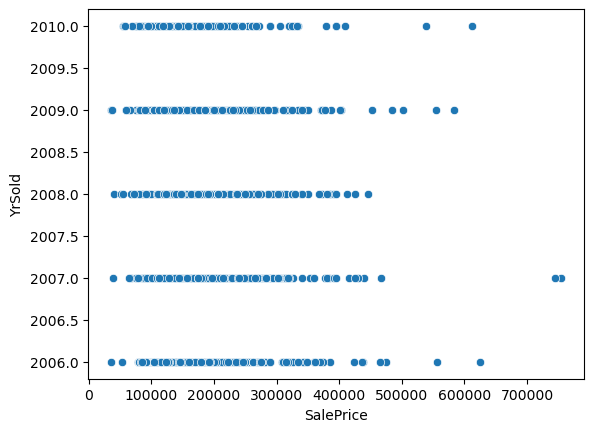

SaleType


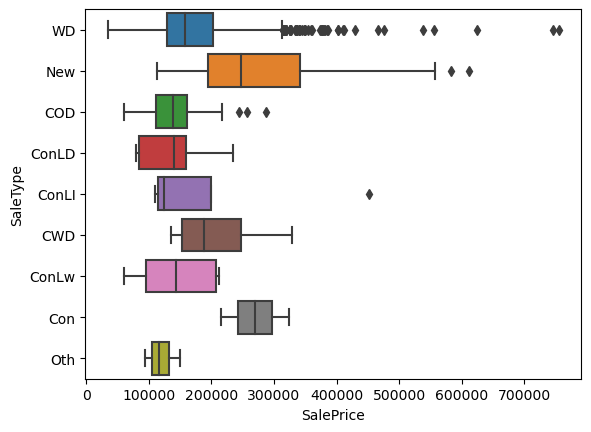

SaleCondition


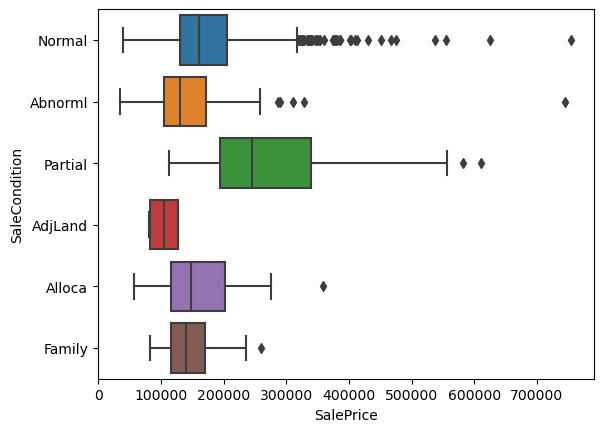

SalePrice


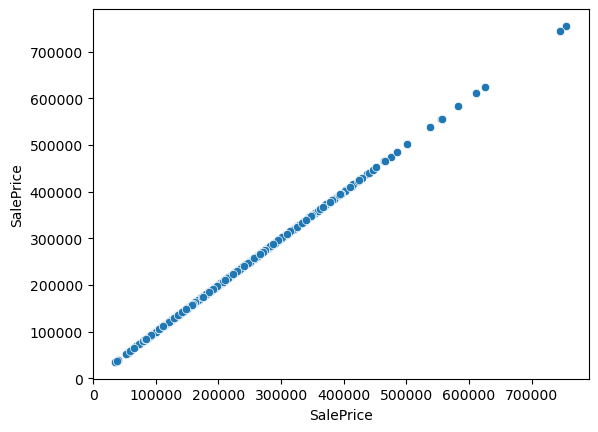

In [11]:
for i in tr_df:
    if tr_df[i].dtype==object:
        sns.boxplot(data=tr_df,x='SalePrice',y=i)
        print(i)
        plt.show()
    else:
        sns.scatterplot(data=tr_df,x='SalePrice',y=i)
        print(i)
        plt.show()

## Divide input and output features

In [12]:
x=tr_df.drop(labels='SalePrice',axis=1)
y=tr_df[['SalePrice']]

# Preprocessing

###  continuous and categorical columns separation

In [13]:
cat=[]
con=[]
for i in x.columns:
    if x[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [14]:
tr_cat=x[cat]
tr_con=x[con]

### Encode categorical columns

In [15]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in tr_cat.columns:
    tr_cat[i]=le.fit_transform(tr_cat[i])
    

In [16]:
tr_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,0,3,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
1,3,1,0,3,3,0,2,0,24,1,...,1,1,4,4,2,2,2,2,8,4
2,3,1,0,0,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
3,3,1,0,0,3,0,0,0,6,2,...,5,2,4,4,2,2,2,2,8,0
4,3,1,0,0,3,0,2,0,15,2,...,1,1,4,4,2,2,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,0,3,3,0,4,0,8,2,...,1,1,4,4,2,2,2,2,8,4
1456,3,1,0,3,3,0,4,0,14,2,...,1,2,4,4,2,2,2,2,8,4
1457,3,1,0,3,3,0,4,0,6,2,...,1,1,4,4,2,2,0,2,8,4
1458,3,1,0,3,3,0,4,0,12,2,...,1,2,4,4,2,2,2,2,8,4


### Feature scaling

In [17]:
# standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
tr_con=pd.DataFrame(ss.fit_transform(tr_con),columns=con)

In [18]:
tr_con

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,1.723747,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,1.726120,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,1.728492,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [19]:
x=tr_con.join(tr_cat)

## outliers treatment

In [20]:
out=[]
for i in tr_con.columns:
    ol=tr_con[(tr_con[i]<-3)|(tr_con[i]>3)].index
    out.extend(ol)


In [21]:
outliers=list(set(out))

In [22]:
# Drop outliers
x=x.drop(index=outliers,axis=0)
y=y.drop(index=outliers,axis=0)

In [23]:
# Reset index
x.index=range(0,x.shape[0])
y.index=range(0,y.shape[0])

In [24]:
# Divide data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

# model building
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)

# prediction
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

# model evalution
from sklearn.metrics import r2_score
tr_score=r2_score(ytrain,tr_pred)
ts_score=r2_score(ytest,ts_pred)

print(tr_score)
print(ts_score)

0.9128234515618631
0.8783060868158468


# Feature Selection

##  forward Selection

In [25]:

selected_columns = list(con)
for col in cat:
    x_temp = x[selected_columns + [col]]
    
    temp_xtrain, temp_xtest = train_test_split(x_temp, test_size=0.2, random_state=21)

    temp_xtrain = ss.fit_transform(temp_xtrain)
    temp_xtest = ss.transform(temp_xtest)
    
    
    model.fit(temp_xtrain, ytrain)
    pred=model.predict(temp_xtest)
    new_score = r2_score(ytest, pred)
    
    if (new_score > (ts_score)) :
        ts_score = new_score
        tr_score = new_score
        selected_columns.append(col)
        xtrain = temp_xtrain
        xtest = temp_xtest
        print('Added column:', col, 'New score:', new_score)
    else:
        print('Dropped column:' ,col, 'score:', new_score)

print('Selected columns:', selected_columns)

Dropped column: MSZoning score: 0.8679735596622973
Dropped column: Street score: 0.8655983548110496
Dropped column: Alley score: 0.8671247204095113
Dropped column: LotShape score: 0.8675162899595432
Dropped column: LandContour score: 0.8673823234986104
Dropped column: Utilities score: 0.8673041248202297
Dropped column: LotConfig score: 0.8670235185246639
Dropped column: LandSlope score: 0.8676099265089032
Dropped column: Neighborhood score: 0.8664114384233006
Dropped column: Condition1 score: 0.8660109236593785
Dropped column: Condition2 score: 0.85912556902569
Dropped column: BldgType score: 0.8678239741533648
Dropped column: HouseStyle score: 0.866727881154858
Dropped column: RoofStyle score: 0.8677095023449384
Dropped column: RoofMatl score: 0.862656373639466
Dropped column: Exterior1st score: 0.8681619007698425
Dropped column: Exterior2nd score: 0.866850998607958
Dropped column: MasVnrType score: 0.870467496912755
Added column: ExterQual New score: 0.8815577411330755
Added column: 

In [26]:
len(selected_columns)

54

In [27]:
x=x[selected_columns]
x.shape

(1021, 54)

## Backward Elimination

In [28]:
from statsmodels.api import add_constant,OLS
ols=OLS(ytrain,add_constant(xtrain))
model=ols.fit()
previous_score = round(model.rsquared_adj, 3)

In [29]:
x=x_temp

In [51]:
# Sort p-values and get the column name with the highest p-value
while True:
    c = model.pvalues.sort_values().index[-1]

    if c in x.columns:
        x = x.drop(labels=c, axis=1)
        print(f"Column '{c}' dropped successfully.")
    else:
        print(f"Column '{c}' not found in DataFrame.")
    
    
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=21)
    ols = OLS(ytrain, add_constant(xtrain))
    model=ols.fit()
    score=round(model.rsquared_adj,3)
    
    if score <= previous_score:
        print(score)
        break
        
    previous_score = score

    c=model.pvalues.sort_values().index[-1] 

    print('next column to drop :',c)
    print(score)




Column 'LotFrontage' dropped successfully.
0.896


In [52]:
len(x.columns)

32

## Ridge with GridSearchCV

In [53]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV
hp={'alpha': [0.1,10, 20, 30, 40, 50, 100], 'random_state': [0.1, 10, 20, 50, 100]}

grid_search_ridge = GridSearchCV(estimator=Ridge(), param_grid=hp, cv=5, scoring='neg_mean_absolute_error')

grid_search_ridge.fit(x, y)

best_params_ridge = grid_search_ridge.best_params_
print("Best parameters for Ridge Regression: ", best_params_ridge)

Best parameters for Ridge Regression:  {'alpha': 30, 'random_state': 10}


## Train-Test Split

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21)

## Final Model Building Ridge

In [55]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
rr=Ridge(alpha=30,random_state=10)

# model building
rr_model=rr.fit(xtrain,ytrain)

# prediction
rr_tr_pred=rr_model.predict(xtrain)
rr_ts_pred=rr_model.predict(xtest)
 
# model evalution
mse_train=mean_squared_error(ytrain,rr_tr_pred)
mse_test=mean_squared_error(ytest,rr_ts_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

mae_train=mean_absolute_error(ytrain,rr_tr_pred)
mae_test=mean_absolute_error(ytest,rr_ts_pred)

r2_train=r2_score(ytrain,rr_tr_pred)
r2_test=r2_score(ytest,rr_ts_pred)

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n_train = len(ytrain)
k_train = xtrain.shape[1]
r2_adj_train = adjusted_r2(r2_train, n_train, k_train)

n_test = len(ytest)
k_test = xtest.shape[1]
r2_adj_test = adjusted_r2(r2_test, n_test, k_test)

print(f'Training Metrics:')
print(f'MSE: {mse_train}')
print(f'RMSE: {rmse_train}')
print(f'MAE: {mae_train}')
print(f'R²: {r2_train}')
print(f'R²_adj: {r2_adj_train}')
print()
print(f'Testing Metrics:')
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')
print(f'MAE: {mae_test}')
print(f'R²: {r2_test}')
print(f'R²_adj: {r2_adj_test}')

Training Metrics:
MSE: 471472424.8083711
RMSE: 21713.415779383286
MAE: 15332.493889358802
R²: 0.8984823262888381
R²_adj: 0.8943334558434266

Testing Metrics:
MSE: 401173414.0961283
RMSE: 20029.313869829097
MAE: 14503.220815449895
R²: 0.8976830297427759
R²_adj: 0.8786473143460831


# Testing Data

In [57]:
ts_df=pd.read_csv('testing_set.csv')

In [58]:
# null value treatment
for i in ts_df.columns:
    if ts_df[i].dtypes==object:
        ts_df[i]=ts_df[i].fillna(ts_df[i].mode()[0])
    else:
        ts_df[i]=ts_df[i].fillna(ts_df[i].mean())

In [59]:
# cat and con separation
xcat=[]
xcon=[]
for i in ts_df.columns:
    if ts_df[i].dtypes==object:
        xcat.append(i)
    else:
        xcon.append(i)

In [60]:
ts_cat=ts_df[xcat]
ts_con=ts_df[xcon]

In [61]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ts_cat.columns:
    ts_cat[i]=le.fit_transform(ts_cat[i])

In [62]:
# standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ts_con=pd.DataFrame(ss.fit_transform(ts_con),columns=xcon)

In [63]:
test_df=ts_con.join(ts_cat)

In [64]:
new=test_df[x.columns]

In [65]:
# predictions
test_predictions =rr_model.predict(new)
test_predictions=np.around((test_predictions),1)

In [73]:
predictions=ts_df[['Id']]
predictions['SalePrice']=test_predictions

In [74]:
predictions.to_csv("Sales Price.csv",index=False)

In [75]:
pd.read_csv("Sales Price.csv")

,Id,SalePrice
0,1461,131312.4
1,1462,185724.6
2,1463,182346.5
3,1464,207205.4
4,1465,183731.8
...,...,...
1454,2915,73717.4
1455,2916,71039.9
1456,2917,189794.9
1457,2918,120650.6
